# Amazon dataset exploration 
## data cleaning, data analysis 
### object: find out what kind of products have better sales and are good deal
#### 对亚马逊数据集进行数据清洗、对价格、销量、折扣等进行数据分析

In [1]:
# import packages;
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import missingno as msno
#visualization for missing values
#对空值进行可视化的包

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# more advanced for visualizing plot 增加图表的可操作性

In [4]:
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

D:\APP\anaconda_sec\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [5]:
# read csv file 导入csv文件
file_path = 'D:\\Dataset\\Amazon-Products.csv'
df = pd.read_csv(file_path)

### Data Understanding

In [6]:
df.shape

(551585, 10)

In [7]:
df.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0         int64
name              object
main_category     object
sub_category      object
image             object
link              object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


<Axes: >

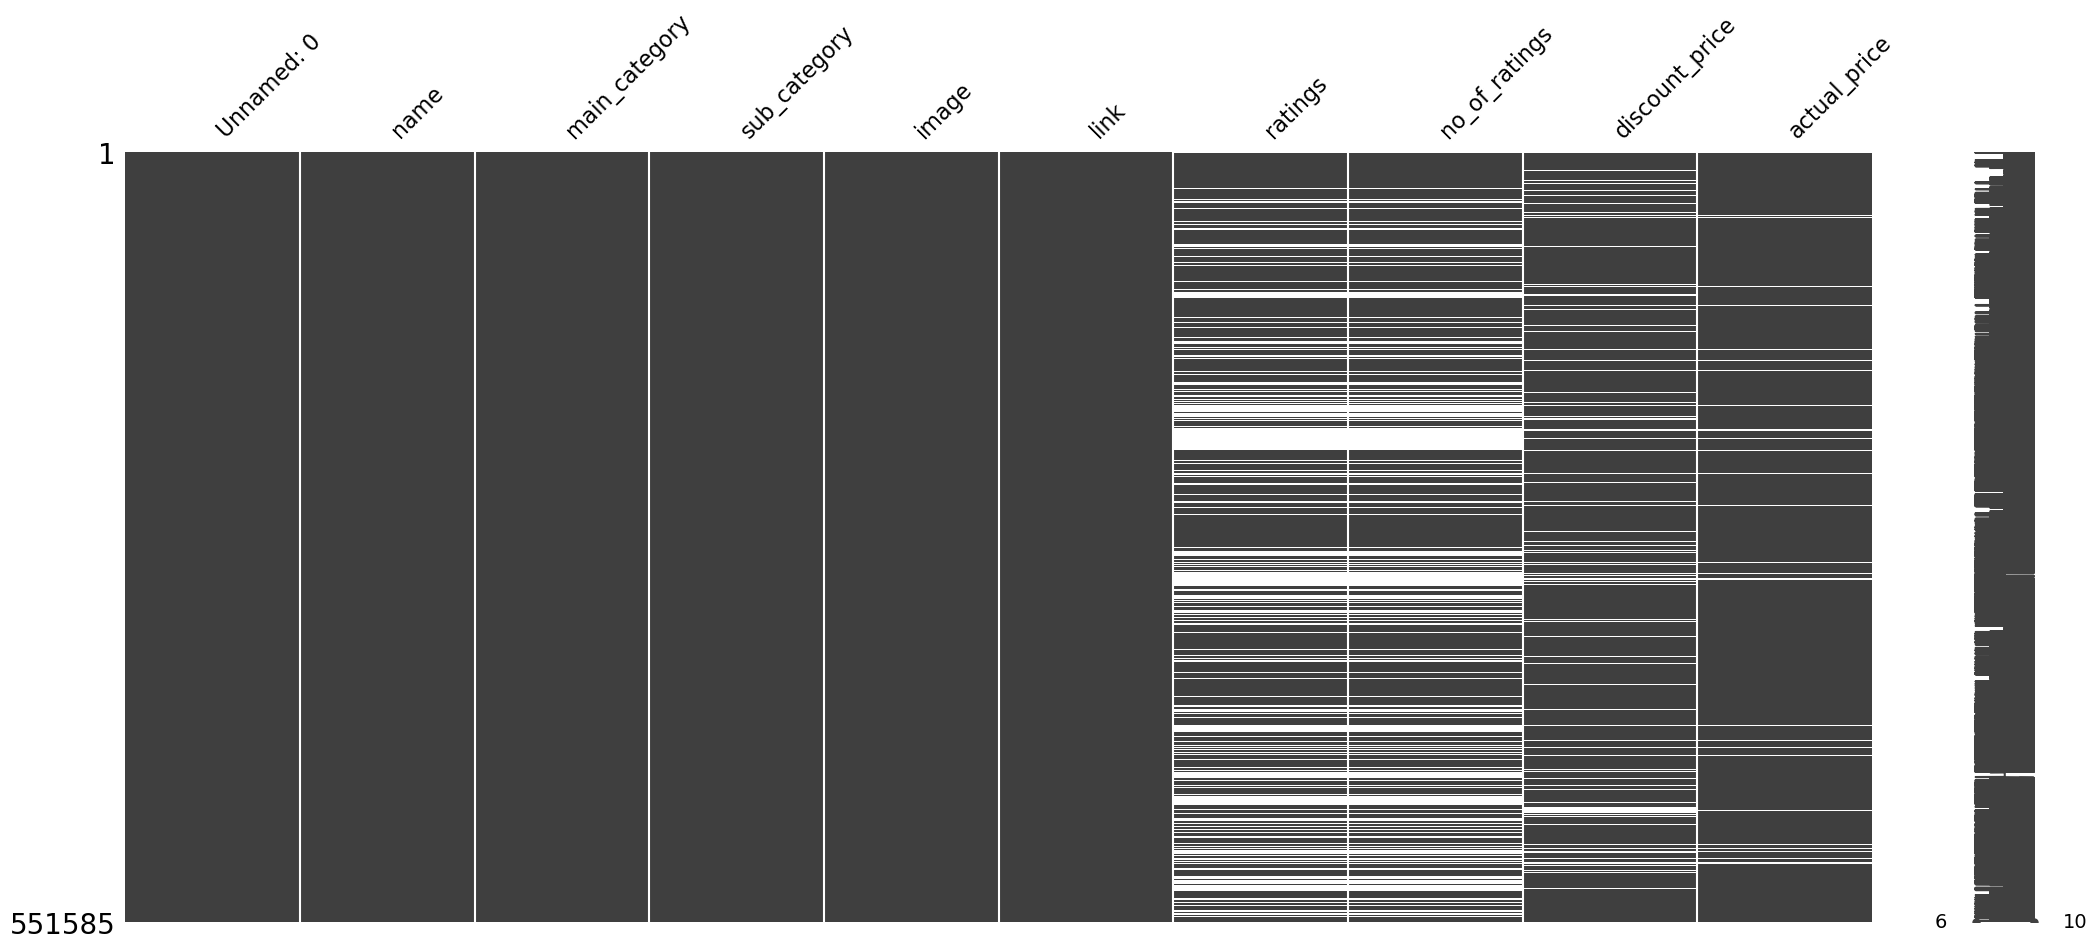

In [10]:
msno.matrix(df)


<Axes: >

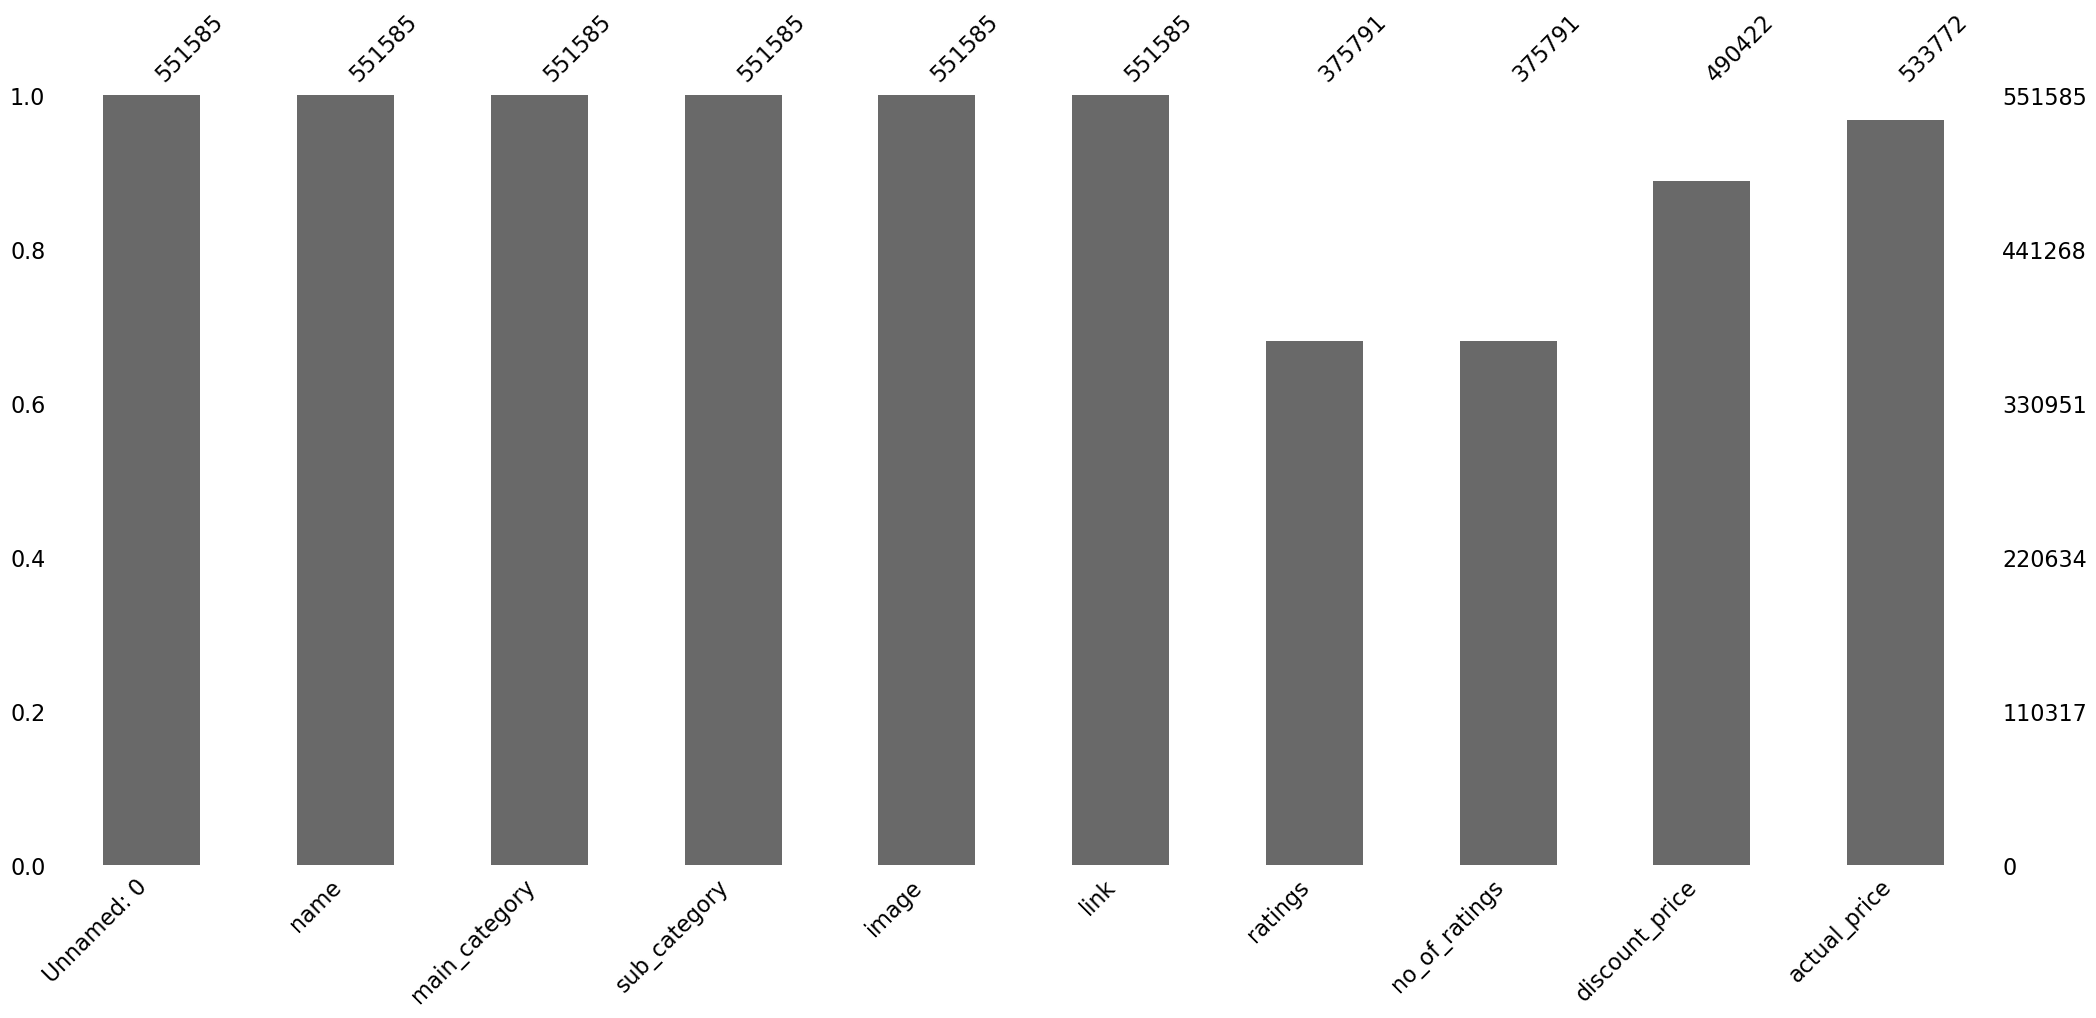

In [11]:
msno.bar(df)

In [12]:
df.isnull().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [13]:
df.head(5)

Unnamed: 0                                               name  \
0           0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...   
1           1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...   
2           2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...   
3           3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...   
4           4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...   

  main_category      sub_category  \
0    appliances  Air Conditioners   
1    appliances  Air Conditioners   
2    appliances  Air Conditioners   
3    appliances  Air Conditioners   
4    appliances  Air Conditioners   

                                               image  \
0  https://m.media-amazon.com/images/I/31UISB90sY...   
1  https://m.media-amazon.com/images/I/51JFb7FctD...   
2  https://m.media-amazon.com/images/I/51JFb7FctD...   
3  https://m.media-amazon.com/images/I/51JFb7FctD...   
4  https://m.media-amazon.com/images/I/41lrtqXPiW...   

                                                link ratings no_of_ratings  \
0  https://www.amazon.in/Lloyd-Inverter-Convertib...     4.2         2,255   
1  https://www.amazon.in/LG-Convertible-Anti-Viru...     4.2         2,948   
2  https://www.amazon.in/LG-Inverter-Convertible-...     4.2         1,206   
3  https://www.amazon.in/LG-Convertible-Anti-Viru...     4.0            69   
4  https://www.amazon.in/Carrier-Inverter-Split-C...     4.1           630   

  discount_price actual_price  
0        ₹32,999      ₹58,990  
1        ₹46,490      ₹75,990  
2        ₹34,490      ₹61,990  
3        ₹37,990      ₹68,990  
4        ₹34,490      ₹67,790

### DATA preperation
    drop irrelevant columns and rows
    change data type
    rename columns
#### 根据第一部分对数据集的观察，接下将进行数据清理，主要处理以下几个部分
     删去不影响分析的行和列
     转换具体列的数据类型
     重命名列名，同时创建新的列求折扣金额及折扣率

In [15]:
df['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [16]:
#since there is no 0 rating, remove those non-numeric, replace them with 0 to represent these unclear values
df['ratings'] = df['ratings'].replace(['Get','FREE','₹68.99','₹65','₹70','₹100','₹99','₹2.99'],'0.0')
df['ratings'] = df['ratings'].astype(float)

In [17]:
df['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, nan, 4.6, 3.3, 3.4, 3.7, 2.9,
       5. , 4.4, 3.6, 2.7, 4.5, 3. , 3.1, 3.2, 4.8, 4.7, 2.5, 1. , 2.6,
       2.8, 2.3, 1.7, 0. , 1.8, 2.4, 4.9, 2.2, 1.6, 1.9, 2. , 1.4, 2.1,
       1.2, 1.3, 1.5, 1.1])

In [ ]:
# pd.options.display.max_rows = 1000
# to observe more rows in a columns 
# 调整值的大小方便观察更多的行

In [18]:
df['no_of_ratings'].head(10)
# there are strings like 'Only 1 left in stock.' in this column （index 693? i guess). it should be removed first
# rating 这列有非数值型值，需要先将他们替换成空值，同时去掉数字型的值中的逗号方便将整列转换为数值型

0    2,255
1    2,948
2    1,206
3       69
4      630
5    1,666
6    1,097
7    1,494
8      674
9      801
Name: no_of_ratings, dtype: object

In [19]:
# this columns suppose to be numeric
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',','')
#first need to remove ',' otherwise errors='coerce' will assume something like 3,670 is a string

In [20]:
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')
# convert to numeric value, and for those are strings, the errors='coerce' command can transform them as null value

In [22]:
# from 375791 non-null to 369558
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   image           551585 non-null  object 
 5   link            551585 non-null  object 
 6   ratings         375791 non-null  float64
 7   no_of_ratings   369558 non-null  float64
 8   discount_price  490422 non-null  object 
 9   actual_price    533772 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 42.1+ MB


In [23]:
df[['discount_price', 'actual_price']].head(10)

discount_price actual_price
0        ₹32,999      ₹58,990
1        ₹46,490      ₹75,990
2        ₹34,490      ₹61,990
3        ₹37,990      ₹68,990
4        ₹34,490      ₹67,790
5        ₹31,990      ₹70,990
6        ₹29,999      ₹49,990
7        ₹39,990      ₹67,990
8        ₹30,990      ₹58,190
9        ₹37,999      ₹73,990

In [24]:
#drop null value for further analysis
# 去掉这两列中的空值
df = df.dropna(subset = ['discount_price','actual_price'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490422 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      490422 non-null  int64  
 1   name            490422 non-null  object 
 2   main_category   490422 non-null  object 
 3   sub_category    490422 non-null  object 
 4   image           490422 non-null  object 
 5   link            490422 non-null  object 
 6   ratings         340680 non-null  float64
 7   no_of_ratings   334963 non-null  float64
 8   discount_price  490422 non-null  object 
 9   actual_price    490422 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 41.2+ MB


In [26]:
df.head(10)

Unnamed: 0                                               name  \
0           0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...   
1           1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...   
2           2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...   
3           3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...   
4           4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...   
5           5  Voltas 1.4 Ton 3 Star Inverter Split AC(Copper...   
6           6  Lloyd 1.0 Ton 3 Star Inverter Split Ac (5 In 1...   
7           7  Lloyd 1.5 Ton 5 Star Inverter Split Ac (5 In 1...   
8           8  Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...   
9           9  Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...   

  main_category      sub_category  \
0    appliances  Air Conditioners   
1    appliances  Air Conditioners   
2    appliances  Air Conditioners   
3    appliances  Air Conditioners   
4    appliances  Air Conditioners   
5    appliances  Air Conditioners   
6    appliances  Air Conditioners   
7    appliances  Air Conditioners   
8    appliances  Air Conditioners   
9    appliances  Air Conditioners   

                                               image  \
0  https://m.media-amazon.com/images/I/31UISB90sY...   
1  https://m.media-amazon.com/images/I/51JFb7FctD...   
2  https://m.media-amazon.com/images/I/51JFb7FctD...   
3  https://m.media-amazon.com/images/I/51JFb7FctD...   
4  https://m.media-amazon.com/images/I/41lrtqXPiW...   
5  https://m.media-amazon.com/images/I/41TuyxwZ9m...   
6  https://m.media-amazon.com/images/I/31IXlxIPsO...   
7  https://m.media-amazon.com/images/I/31IXlxIPsO...   
8  https://m.media-amazon.com/images/I/51sTXvsanQ...   
9  https://m.media-amazon.com/images/I/51WQ3nWF0v...   

                                                link  ratings  no_of_ratings  \
0  https://www.amazon.in/Lloyd-Inverter-Convertib...      4.2         2255.0   
1  https://www.amazon.in/LG-Convertible-Anti-Viru...      4.2         2948.0   
2  https://www.amazon.in/LG-Inverter-Convertible-...      4.2         1206.0   
3  https://www.amazon.in/LG-Convertible-Anti-Viru...      4.0           69.0   
4  https://www.amazon.in/Carrier-Inverter-Split-C...      4.1          630.0   
5  https://www.amazon.in/Voltas-Adjustable-173V-V...      4.0         1666.0   
6  https://www.amazon.in/Lloyd-Inverter-Convertib...      4.2         1097.0   
7  https://www.amazon.in/Lloyd-Inverter-Convertib...      4.3         1494.0   
8  https://www.amazon.in/Carrier-Flexicool-Invert...      4.1          674.0   
9  https://www.amazon.in/Voltas-Inverter-Split-Co...      4.0          801.0   

  discount_price actual_price  
0        ₹32,999      ₹58,990  
1        ₹46,490      ₹75,990  
2        ₹34,490      ₹61,990  
3        ₹37,990      ₹68,990  
4        ₹34,490      ₹67,790  
5        ₹31,990      ₹70,990  
6        ₹29,999      ₹49,990  
7        ₹39,990      ₹67,990  
8        ₹30,990      ₹58,190  
9        ₹37,999      ₹73,990

In [27]:
# index is not sequential, adjust it
# 去空值后 索引不再连续，设置新的索引 不保留旧的
df = df.reset_index(drop = True)

In [28]:
# the discount_pirce and actual_price have the same problem. monetary unit need to be removed for converting columns type to float
# the discount_pirce 和 actual_price 需要将其中的货币符号除去，包括逗号，在转换为数值型
new_discount = []
for i in range(len(df)):
    value = df.loc[i,'discount_price']
    value = value.replace('₹','').replace(',','')
    new_discount.append(float(value))
df['discount_price'] = new_discount

In [29]:
new_actual = []
for i in range(len(df)):
    value = df.loc[i,'actual_price']
    value = value.replace('₹','').replace(',','')
    new_actual.append(float(value))
df['actual_price'] = new_actual

In [30]:
df[['discount_price', 'actual_price']].head(10)

discount_price  actual_price
0         32999.0       58990.0
1         46490.0       75990.0
2         34490.0       61990.0
3         37990.0       68990.0
4         34490.0       67790.0
5         31990.0       70990.0
6         29999.0       49990.0
7         39990.0       67990.0
8         30990.0       58190.0
9         37999.0       73990.0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490422 entries, 0 to 490421
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      490422 non-null  int64  
 1   name            490422 non-null  object 
 2   main_category   490422 non-null  object 
 3   sub_category    490422 non-null  object 
 4   image           490422 non-null  object 
 5   link            490422 non-null  object 
 6   ratings         340680 non-null  float64
 7   no_of_ratings   334963 non-null  float64
 8   discount_price  490422 non-null  float64
 9   actual_price    490422 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 37.4+ MB


In [32]:
df.isnull().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           149742
no_of_ratings     155459
discount_price         0
actual_price           0
dtype: int64

In [33]:
#drop null for further analysis
# 除去空值
df = df.dropna(subset = ['ratings','no_of_ratings'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334963 entries, 0 to 490421
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      334963 non-null  int64  
 1   name            334963 non-null  object 
 2   main_category   334963 non-null  object 
 3   sub_category    334963 non-null  object 
 4   image           334963 non-null  object 
 5   link            334963 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   334963 non-null  float64
 8   discount_price  334963 non-null  float64
 9   actual_price    334963 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 28.1+ MB


In [35]:
#from name column get manufacturer
df['manufacturer'] = df['name'].str.split(' ').str[0]
# But it doesn't perfect. Such as names start with 'The', these names have multiple words for manufacturer. 
# such case ain't account a large part of the dataset and will not get in the way for general observation.
# 从name列中首个单词获取制造商，但有些制造商不止一个单词组成，但是这部分占部分较少不影响对数据集总体的理解

In [36]:
# remove the 'unnamed:0' since not provide any significant information
df = df[[ 'name','manufacturer', 'main_category', 'sub_category',
       'image', 'link', 'ratings', 'no_of_ratings', 'discount_price',
       'actual_price']]
# 移去 unnamed:0 列

In [37]:
df.head()

name manufacturer  \
0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...        Lloyd   
1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...           LG   
2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...           LG   
3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...           LG   
4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...      Carrier   

  main_category      sub_category  \
0    appliances  Air Conditioners   
1    appliances  Air Conditioners   
2    appliances  Air Conditioners   
3    appliances  Air Conditioners   
4    appliances  Air Conditioners   

                                               image  \
0  https://m.media-amazon.com/images/I/31UISB90sY...   
1  https://m.media-amazon.com/images/I/51JFb7FctD...   
2  https://m.media-amazon.com/images/I/51JFb7FctD...   
3  https://m.media-amazon.com/images/I/51JFb7FctD...   
4  https://m.media-amazon.com/images/I/41lrtqXPiW...   

                                                link  ratings  no_of_ratings  \
0  https://www.amazon.in/Lloyd-Inverter-Convertib...      4.2         2255.0   
1  https://www.amazon.in/LG-Convertible-Anti-Viru...      4.2         2948.0   
2  https://www.amazon.in/LG-Inverter-Convertible-...      4.2         1206.0   
3  https://www.amazon.in/LG-Convertible-Anti-Viru...      4.0           69.0   
4  https://www.amazon.in/Carrier-Inverter-Split-C...      4.1          630.0   

   discount_price  actual_price  
0         32999.0       58990.0  
1         46490.0       75990.0  
2         34490.0       61990.0  
3         37990.0       68990.0  
4         34490.0       67790.0

In [38]:
# check duplicated rows
df.loc[df.duplicated()]

Empty DataFrame
Columns: [name, manufacturer, main_category, sub_category, image, link, ratings, no_of_ratings, discount_price, actual_price]
Index: []

In [39]:
# giving the discount_price and actual_price, we can calculate the discount value and discount rate
# give them a column respectively
# 新建 折扣金额及折扣比率 两列
df['discount_value'] = df['actual_price'] - df['discount_price']
df['discount_rate'] = df['discount_value']/df['actual_price']

In [40]:
pd.reset_option('display.max_colwidth')

In [42]:
df.head(2)

name manufacturer  \
0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...        Lloyd   
1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...           LG   

  main_category      sub_category  \
0    appliances  Air Conditioners   
1    appliances  Air Conditioners   

                                               image  \
0  https://m.media-amazon.com/images/I/31UISB90sY...   
1  https://m.media-amazon.com/images/I/51JFb7FctD...   

                                                link  ratings  no_of_ratings  \
0  https://www.amazon.in/Lloyd-Inverter-Convertib...      4.2         2255.0   
1  https://www.amazon.in/LG-Convertible-Anti-Viru...      4.2         2948.0   

   discount_price  actual_price  discount_value  discount_rate  
0         32999.0       58990.0         25991.0       0.440600  
1         46490.0       75990.0         29500.0       0.388209

In [43]:
# done data cleaning part

### Feature understanding
#### univariate analysis, plotting feature dustributions

In [44]:
df.describe()

ratings  no_of_ratings  discount_price  actual_price  \
count  334963.000000  334963.000000    3.349630e+05  3.349630e+05   
mean        3.814368     853.864540    1.759009e+03  3.298855e+04   
std         0.754169    8890.977903    6.394477e+03  1.710586e+07   
min         1.000000       1.000000    8.000000e+00  1.000000e+01   
25%         3.500000       4.000000    3.590000e+02  9.000000e+02   
50%         3.900000      20.000000    5.990000e+02  1.499000e+03   
75%         4.200000     131.000000    1.199000e+03  2.799000e+03   
max         5.000000  589547.000000    1.249990e+06  9.900000e+09   

       discount_value  discount_rate  
count    3.349630e+05  334963.000000  
mean     3.122954e+04       0.509530  
std      1.710586e+07       0.214749  
min      1.000000e-02       0.000005  
25%      3.890000e+02       0.364364  
50%      7.990000e+02       0.530666  
75%      1.575000e+03       0.679680  
max      9.899999e+09       1.000000

Text(0.5, 1.0, 'Distribution of Ratings')

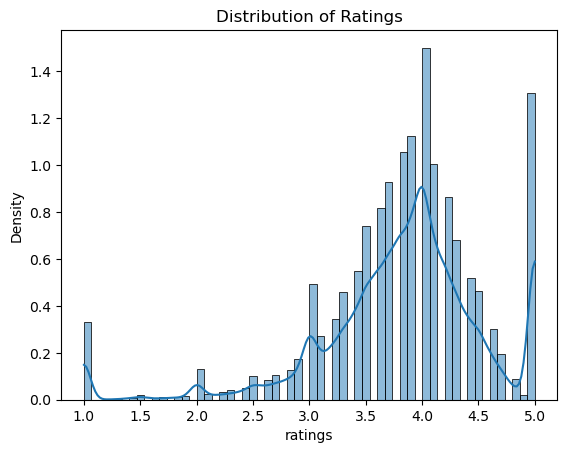

In [45]:
sns.histplot(df['ratings'],kde=True, bins = 60,stat="density")

plt.title("Distribution of Ratings")

# it looks like most of the ratings lie between 3 and 4.5. 大部分评分集中在4左右
# it is quite typical of rating distributions in many online platforms. 常规的电商评分分布
# Products with higher ratings are often more likely to get recommended to new customers,
# which can lead to a positive feedback loop where more customers rate the product highly,
# increasing its overall rating. 
# 评分高的商品会被更多地推荐给新消费者形成一个正向循环

In [46]:
# instead of simply observing this ratings distribution. 
# let's pick up some categories that have a good number of sales
# 根据分类、制造商等进行进一步分析

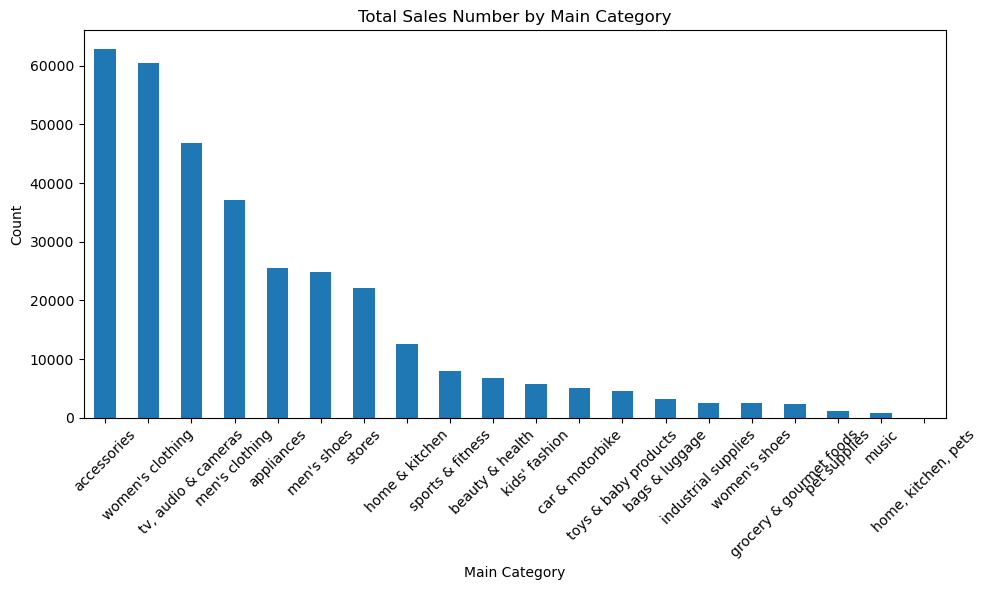

In [47]:
# based on this dataset, we can get the total sales records under different categories
# 先观察哪些分类下的销售数量较好
ax = df['main_category'].value_counts().plot(kind = 'bar',figsize=(10,6))

ax.set_title('Total Sales Number by Main Category')
ax.set_xlabel('Main Category')
ax.set_ylabel('Count')
# set the x-axis labels rotation angle
plt.xticks(rotation=45)
#adjust spacing
plt.tight_layout()

plt.show()

In [48]:
# accessories is the most dominant category, we can go detailed to observe the sales numbers under sub_category
# accessories 销量最多，进一步观察他有什么二级分类，先将它单独筛出来
accessories_df = df[df['main_category'] == 'accessories']

Text(0.5, 1.0, 'Distribution of Ratings of accessories')

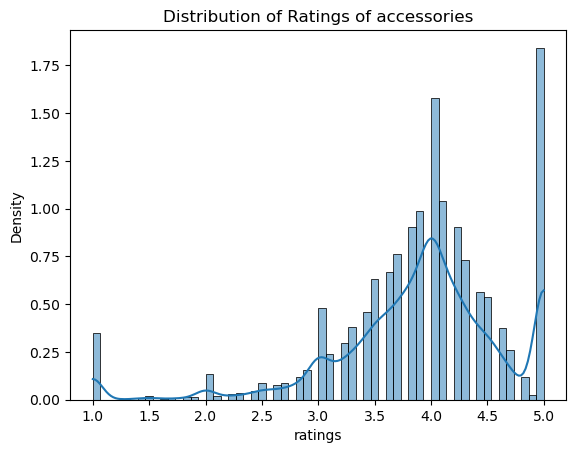

In [49]:
# also, use seaborn to see the distribution of rating under 'accessories'.
# It's quite similar compared with the whole dataset's distribution
# but products under accessories category seems well-received by customers (acount more in rating around 4.8 )
# 跟总体的评分分布进行对比，accessories在接近5分的评分占比要稍高一些
sns.histplot(accessories_df['ratings'],kde=True, bins = 60,stat="density")

plt.title("Distribution of Ratings of accessories")

In [50]:
# let's go further to see how's going under various sub_categories
# 观察二级分类的销售情况
accessories_df['sub_category'].value_counts()

Bags & Luggage                15961
Fashion & Silver Jewellery    15020
Handbags & Clutches           12521
Jewellery                     11190
Watches                        6942
Gold & Diamond Jewellery       1060
Sunglasses                      175
Name: sub_category, dtype: int64

In [51]:
# silver jewellery sells way more than gold & diamond jewellery,let's start observing them by their ratings and price
# by looking into the boxplot created, we can see these two categories have pretty different distribution of rating
# 银饰比金饰钻石销量高出很多，通过箱线图可以观察到二者的评分分布很不一样

In [53]:
silver = accessories_df.loc[accessories_df['sub_category']=='Fashion & Silver Jewellery',['actual_price','discount_value','discount_rate']].mean()
gold_n_diamond = accessories_df.loc[accessories_df['sub_category']=='Gold & Diamond Jewellery',['actual_price','discount_value','discount_rate']].mean()
print(silver)
print(gold_n_diamond)
#观察二者在售价、折扣、折扣率之间的差别,可以发现银饰售价几乎是金饰钻石的十倍，同时折扣率较高
# see the difference between these two types of jewellery on price and discount rate

actual_price      2190.194039
discount_value    1456.450399
discount_rate        0.661787
dtype: float64
actual_price      21569.245604
discount_value     3616.196349
discount_rate         0.194118
dtype: float64


In [54]:
# Gold & Diamond Jewellery actually sells 10 times higher than Fashion & Silver Jewellery
# That could one of the reasons to explain why Gold & Diamond Jewellery didn't sell a lot!
# not to mention it didn't have a solid discount compared with Fashion & Silver Jewellery

In [55]:
# sns.violinplot(x="sub_category", y="ratings", data=accessories_df,palette='rainbow')

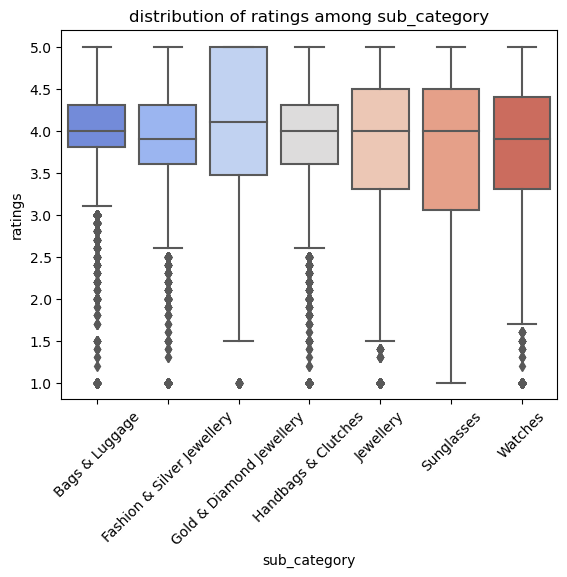

In [56]:
sns.boxplot(x="sub_category", y="ratings",data=accessories_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('distribution of ratings among sub_category')
plt.show()

In [57]:
# It is interesting that this plot shows the more sells the sub_category, the more concentrated the distribution of rating it is.
# 结合各分类的销量，可以观察到一种现象评分更集中的分类销量要更多些

In [60]:
# we can also see what are the most popular sub_category under the top 5 main_categories by number of sales
# 再缩小下范围，筛选销量最好的五个主分类
top5 = df['main_category'].value_counts().head(5).keys().tolist() # get a list of the name of top five main_category
Top5_main_cate = df[df['main_category'].isin(top5)] #match the dataset where the value in the main_category

In [61]:
top5

['accessories',
 "women's clothing",
 'tv, audio & cameras',
 "men's clothing",
 'appliances']

In [62]:
Top5_main_cate

name manufacturer  \
0       Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...        Lloyd   
1       LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...           LG   
2       LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...           LG   
3       LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...           LG   
4       Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...      Carrier   
...                                                   ...          ...   
487417                            RARE Women Casual Dress         RARE   
487418            eWools Women's Wool Round Neck Cardigan       eWools   
487419                        AND Women's Regular Fit Top          AND   
487420               AMERICAN CREW Women's Slim Fit Jeans     AMERICAN   
487421  Priyali's Collection Cotton Lycra Leggings Com...    Priyali's   

           main_category      sub_category  \
0             appliances  Air Conditioners   
1             appliances  Air Conditioners   
2             appliances  Air Conditioners   
3             appliances  Air Conditioners   
4             appliances  Air Conditioners   
...                  ...               ...   
487417  women's clothing      Western Wear   
487418  women's clothing      Western Wear   
487419  women's clothing      Western Wear   
487420  women's clothing      Western Wear   
487421  women's clothing      Western Wear   

                                                    image  \
0       https://m.media-amazon.com/images/I/31UISB90sY...   
1       https://m.media-amazon.com/images/I/51JFb7FctD...   
2       https://m.media-amazon.com/images/I/51JFb7FctD...   
3       https://m.media-amazon.com/images/I/51JFb7FctD...   
4       https://m.media-amazon.com/images/I/41lrtqXPiW...   
...                                                   ...   
487417  https://m.media-amazon.com/images/I/61XbgWx5Vo...   
487418  https://m.media-amazon.com/images/I/71LKJj9uNf...   
487419  https://m.media-amazon.com/images/I/61nImeIwd3...   
487420  https://m.media-amazon.com/images/I/614K4ein1L...   
487421  https://m.media-amazon.com/images/I/413Ay4J2UE...   

                                                     link  ratings  \
0       https://www.amazon.in/Lloyd-Inverter-Convertib...      4.2   
1       https://www.amazon.in/LG-Convertible-Anti-Viru...      4.2   
2       https://www.amazon.in/LG-Inverter-Convertible-...      4.2   
3       https://www.amazon.in/LG-Convertible-Anti-Viru...      4.0   
4       https://www.amazon.in/Carrier-Inverter-Split-C...      4.1   
...                                                   ...      ...   
487417  https://www.amazon.in/RARE-EP6044-Crepe-Jumpsu...      4.7   
487418  https://www.amazon.in/eWools-Womens-Winterwear...      3.7   
487419  https://www.amazon.in/Womens-Checkered-Regular...      4.6   
487420  https://www.amazon.in/AMERICAN-CREW-Womens-Bla...      3.4   
487421  https://www.amazon.in/Priyalis-Collection-Cott...      3.3   

        no_of_ratings  discount_price  actual_price  discount_value  \
0              2255.0         32999.0       58990.0         25991.0   
1              2948.0         46490.0       75990.0         29500.0   
2              1206.0         34490.0       61990.0         27500.0   
3                69.0         37990.0       68990.0         31000.0   
4               630.0         34490.0       67790.0         33300.0   
...               ...             ...           ...             ...   
487417            6.0           680.0        1999.0          1319.0   
487418          275.0           599.0        2995.0          2396.0   
487419            3.0           429.0        1899.0          1470.0   
487420          129.0           599.0        2199.0          1600.0   
487421           69.0           899.0        1599.0           700.0   

        discount_rate  
0            0.440600  
1            0.388209  
2            0.443620  
3            0.449340  
4            0.491223  
...               ...  
487417       0.6

In [63]:
Top5_main_cate['ratings'].iplot(kind='hist',bins=25)
# 观察这五大分类的评分分布

In [64]:
Top5_main_cate['actual_price'].describe()

count    2.326440e+05
mean     3.616938e+03
std      1.064780e+04
min      3.000000e+01
25%      9.990000e+02
50%      1.550000e+03
75%      2.850000e+03
max      1.594900e+06
Name: actual_price, dtype: float64

In [65]:
#接下来可以观察这张表下，价格的分布，然后此表的价格区间很大，但大部分集中在5000甚至2000以下，简单展示出来
#会在左边堆积，因此设置个阈值来将图表分为3部分

<Axes: xlabel='actual_price', ylabel='Count'>

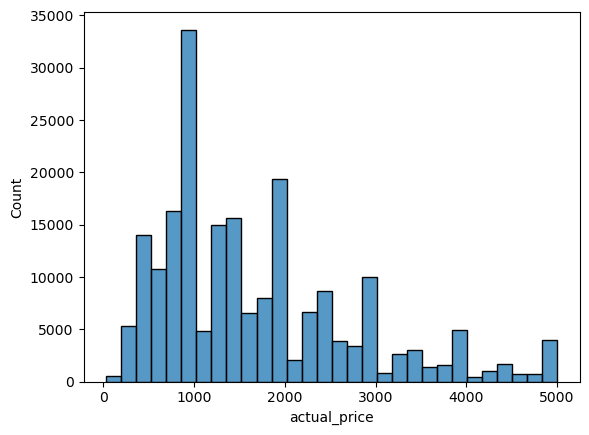

In [66]:
# product price has a wide range and most of them are below 5000, which will create a right skew plot with lots of outliers
# in order to getting a more clear hist plot I need to separate it first
# create two separate histogram for distribution of price
# 
threshold1 = 5000
threshold2 = 40000
sns.histplot(Top5_main_cate[Top5_main_cate['actual_price'] <= threshold1]['actual_price'],kde=False,bins=30)

### From the plot above, we can see that the products price aroud 1000 are most popular and contribute most in this market.
#### 绝大部分的产品价格在2000以下，1000左右这个区间

<Axes: xlabel='actual_price', ylabel='Count'>

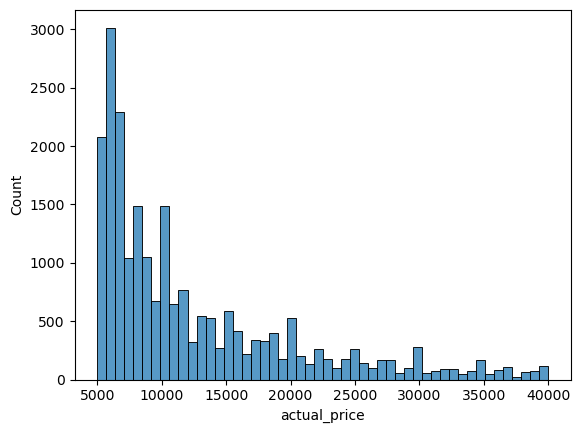

In [69]:
sns.histplot(Top5_main_cate[(Top5_main_cate['actual_price'] > threshold1) & (Top5_main_cate['actual_price'] < threshold2)]['actual_price'],
                 kde=False,bins=50)
# price over 5000 didn't count a lot in the whole dataset
# 可以看到随着价格升高，销量越来越少

<Axes: xlabel='actual_price', ylabel='Count'>

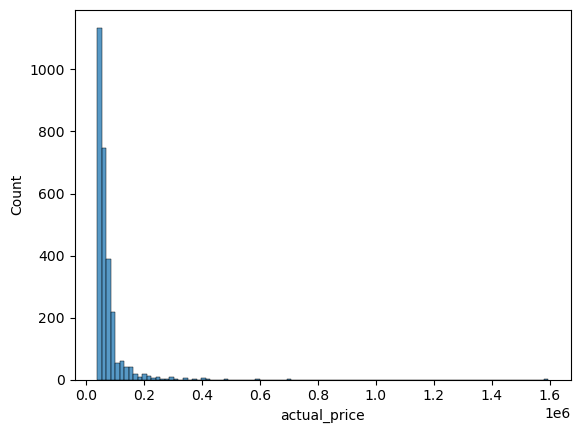

In [68]:
sns.histplot(Top5_main_cate[Top5_main_cate['actual_price'] > threshold2]['actual_price'],kde=False,bins=100)

In [70]:
# to find and locate the outlier
# 可以试着在这张销量前五分类的表中找寻异常值
Q1 = Top5_main_cate['actual_price'].quantile(0.25)
Q3 = Top5_main_cate['actual_price'].quantile(0.75)
IQR = Q3 - Q1

In [71]:
print(Q1,Q3,IQR)

999.0 2850.0 1851.0


In [72]:
outliers = Top5_main_cate[(Top5_main_cate['actual_price'] < Q1 - 1.5 * IQR) | (Top5_main_cate['actual_price'] > Q3 + 1.5 * IQR)]

In [73]:
outliers.head()

name manufacturer  \
0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...        Lloyd   
1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...           LG   
2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...           LG   
3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...           LG   
4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...      Carrier   

  main_category      sub_category  \
0    appliances  Air Conditioners   
1    appliances  Air Conditioners   
2    appliances  Air Conditioners   
3    appliances  Air Conditioners   
4    appliances  Air Conditioners   

                                               image  \
0  https://m.media-amazon.com/images/I/31UISB90sY...   
1  https://m.media-amazon.com/images/I/51JFb7FctD...   
2  https://m.media-amazon.com/images/I/51JFb7FctD...   
3  https://m.media-amazon.com/images/I/51JFb7FctD...   
4  https://m.media-amazon.com/images/I/41lrtqXPiW...   

                                                link  ratings  no_of_ratings  \
0  https://www.amazon.in/Lloyd-Inverter-Convertib...      4.2         2255.0   
1  https://www.amazon.in/LG-Convertible-Anti-Viru...      4.2         2948.0   
2  https://www.amazon.in/LG-Inverter-Convertible-...      4.2         1206.0   
3  https://www.amazon.in/LG-Convertible-Anti-Viru...      4.0           69.0   
4  https://www.amazon.in/Carrier-Inverter-Split-C...      4.1          630.0   

   discount_price  actual_price  discount_value  discount_rate  
0         32999.0       58990.0         25991.0       0.440600  
1         46490.0       75990.0         29500.0       0.388209  
2         34490.0       61990.0         27500.0       0.443620  
3         37990.0       68990.0         31000.0       0.449340  
4         34490.0       67790.0         33300.0       0.491223

In [74]:
outliers['main_category'].value_counts()
# see the outliers under top 5 sales categories
# 销量前五的分类下有多少异常值

tv, audio & cameras    8835
appliances             6710
accessories            6345
women's clothing       1393
men's clothing          186
Name: main_category, dtype: int64

In [76]:
outlier_per = outliers['name'].count()/Top5_main_cate['name'].count()
outlier_per.round(2)

0.1

### roughly 10 % outliers in prince in Top5 main category dataset
#### 在销量前五的分类中，异常值数量占了总体的10%

In [77]:
#given the top 5 main_category, get the top 10 popular sub_category
Top5_main_cate['sub_category'].value_counts().head(10)

Clothing                      16940
Bags & Luggage                15961
Ethnic Wear                   15476
Fashion & Silver Jewellery    15020
Western Wear                  14756
Lingerie & Nightwear          13275
Handbags & Clutches           12521
T-shirts & Polos              12091
Jewellery                     11190
Shirts                        10833
Name: sub_category, dtype: int64

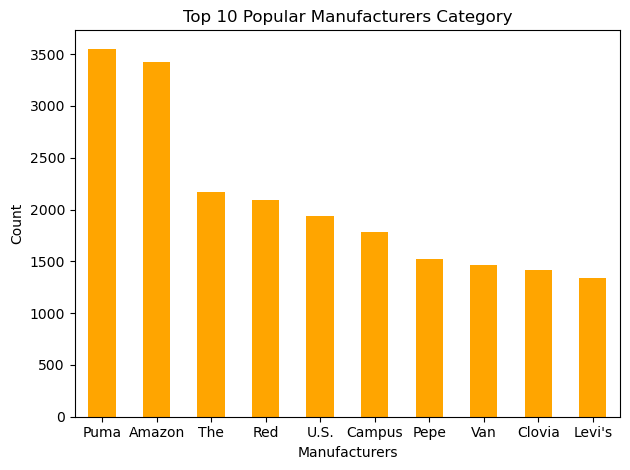

In [79]:
# Back to the previous dataset df that been cleaned, we can also get the popular manufacturers by their numbers of sales
# 除了观察分类，还可以观察销量最好的几家制造商
ax = df['manufacturer'].value_counts().head(10).plot(kind = 'bar',color='orange')

ax.set_title('Top 10 Popular Manufacturers Category')
ax.set_xlabel('Manufacturers')
ax.set_ylabel('Count')
# set the x-axis labels rotation angle
plt.xticks(rotation=0)
#adjust spacing
plt.tight_layout()

plt.show()

In [80]:
# get the top 10 manufacturers by value count
top10manuf = df['manufacturer'].value_counts().head(10).index.tolist()

In [82]:
top10manuf
# 销量前十的十家制造商

['Puma',
 'Amazon',
 'The',
 'Red',
 'U.S.',
 'Campus',
 'Pepe',
 'Van',
 'Clovia',
 "Levi's"]

In [83]:
# filter the dataset to include only the top 10 manufacturers
# 用新的变量去命名
top_manufacturer_df = df[df['manufacturer'].isin(top10manuf)]

In [85]:
top_manufacturer_df[['manufacturer','ratings']].groupby('manufacturer') \
            .mean().round(3).sort_values(by='ratings',ascending = False)
# the first one 'The' as we said before actually contains different manufacturers but not the rest of them
# In this top 10 manfacturer( by sales ) list, we can see Puma sales best but Amazon gets the highest rating.
# 通过求平均评分，可以得出虽然puma销量最好但是amazon的评分其实更高

ratings
manufacturer         
The             3.948
Van             3.944
Amazon          3.940
Puma            3.914
Levi's          3.855
U.S.            3.823
Campus          3.812
Red             3.732
Pepe            3.714
Clovia          3.700

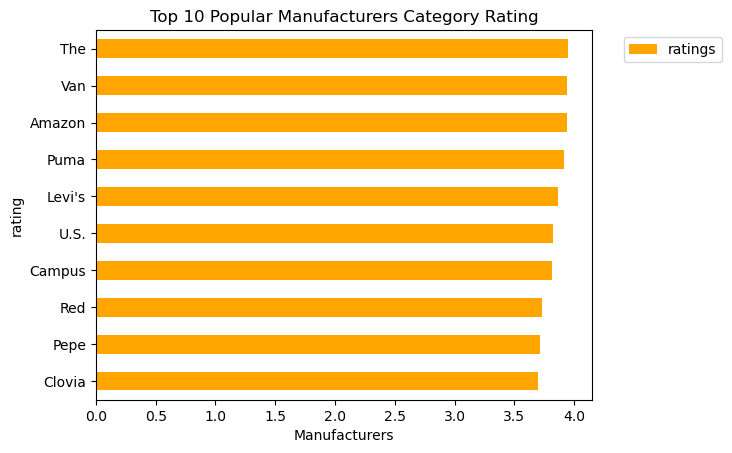

In [86]:
# visualize it
ax = top_manufacturer_df[['manufacturer','ratings']].groupby('manufacturer') \
        .mean().round(2) \
        .sort_values(by='ratings',ascending = True) \
        .plot(kind = 'barh',color='orange')

ax.set_title('Top 10 Popular Manufacturers Category Rating')
ax.set_xlabel('Manufacturers')
ax.set_ylabel('rating')
# set the legend outside the chart
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))


plt.show()


In [87]:
ratings_df = df[['manufacturer','ratings']].groupby('manufacturer') \
            .mean().sort_values(by='ratings',ascending = False)
ratings_df

ratings
manufacturer         
TATTOO            5.0
ZIBUYU®7          5.0
Khushal's         5.0
Kiah              5.0
Rajputana         5.0
...               ...
Krupnil           1.0
Aucorley          1.0
KLIP              1.0
Zara's            1.0
UHAIO             1.0

[37797 rows x 1 columns]

In [88]:
ratings_df[(ratings_df['ratings'] >= 4) & (ratings_df['ratings'] <=5)]
# Top 10 manufacturers by sales aren't necessarily link to high ratings. all of them lie between 3.5 to 4.0
# 销量最好的十家制造商不意味着他们的评分也最高，大多数在3.5到4.0的区间
# almost 16500 manufacturers have a high ratings between 4 and 5
# 大概有16500家制造商评分在4到5区间，高于销量更高的制造商

ratings
manufacturer         
TATTOO            5.0
ZIBUYU®7          5.0
Khushal's         5.0
Kiah              5.0
Rajputana         5.0
...               ...
HYALUS            4.0
FACTCORE�         4.0
HUNK              4.0
Febreze           4.0
Wearable          4.0

[16486 rows x 1 columns]

 ### Puma sales best but Amazon gets the highest rating.

In [90]:
# 出于探索，可以观察评分数以及折扣率之间有无联系

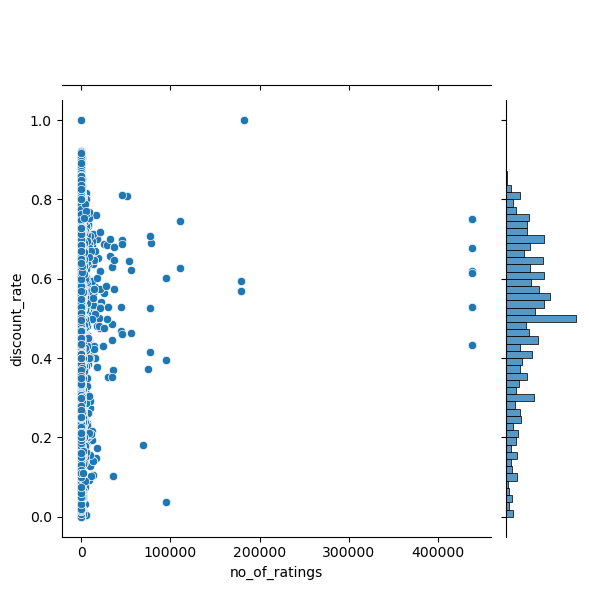

In [89]:
# just out of curiosity, I want to see whether there is any relationship between no_of_rating and discont_rate
sns.jointplot(x='no_of_ratings',y='discount_rate',data=top_manufacturer_df,kind='scatter')
# well, this plot actually can't provide this information.
# BUT, it's interesting to see some products have numbers of ratings over 400k!
# 但此图不能直观的展示出俩者有什么联系，但是竟然能看到有产品评论数超过40万

In [91]:
# use a subset of dataset to get a feel of the relationship of these two variables
# 截取一部分数据来观察，先前我们选出了销量最好的一个分类accessories，来观察其下俩个分类
Silver_Jewellery = accessories_df[accessories_df['sub_category'] == 'Fashion & Silver Jewellery']

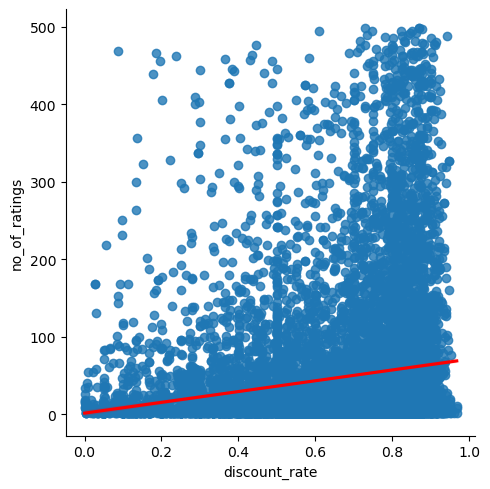

In [93]:
sns.lmplot(x='discount_rate',y='no_of_ratings',
           data=Silver_Jewellery[Silver_Jewellery['no_of_ratings'] < 500],
           line_kws={'color': 'red'})
# yeah it wasn't pretty beacause of the overlapping of marks
# let's use other plot to make it more obvious
# scatter plot也不是很直观，有太多mark堆叠在一起，再换一种方式

<Axes: xlabel='discount_rate', ylabel='no_of_ratings'>

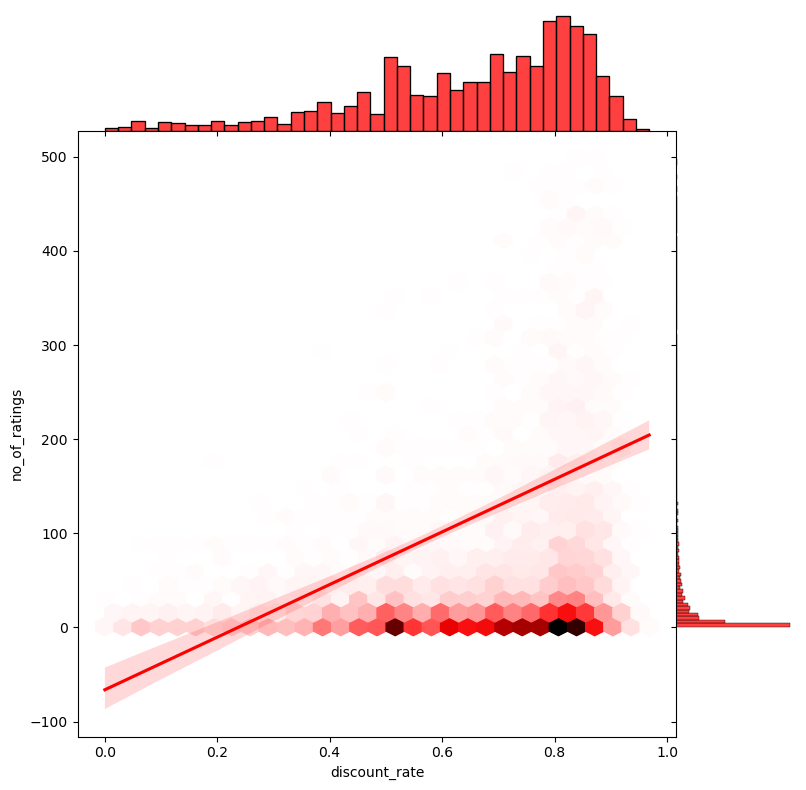

In [94]:
# Create hexbin plot using sns.jointplot()
hexbin_plot = sns.jointplot(x='discount_rate', y='no_of_ratings', 
              data=Silver_Jewellery[(Silver_Jewellery['no_of_ratings'] < 500) & (Silver_Jewellery['discount_rate'] <= 1)],
              kind='hex', height=8, space=0, 
              joint_kws={'gridsize': 30}, marginal_kws={'color': 'red'}, color='red')
# Add regression line using sns.regplot()
sns.regplot(x='discount_rate', y='no_of_ratings', 
            data=Silver_Jewellery, scatter=False, 
            ax=hexbin_plot.ax_joint, color='red')
# now it's more clear and tidy. In this Jewellery dataset, most of the discount rate are around 0.8.
# And we can see higher discount rate also come with more numbers of ratings
# 通过hexbin图可以更清晰的看到折扣率的分布（大多数集中在0.8，以及部分在0.5）以及跟评分数间的关系

In [95]:
Gold_Jewellery = accessories_df[accessories_df['sub_category'] == 'Gold & Diamond Jewellery']

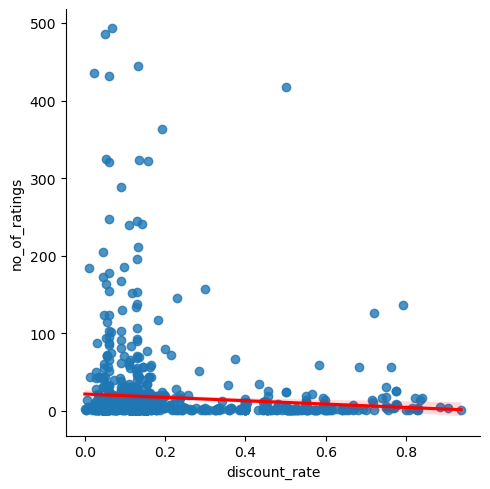

In [96]:
sns.lmplot(x='discount_rate',y='no_of_ratings',
           data=Gold_Jewellery[Gold_Jewellery['no_of_ratings'] < 500],
           line_kws={'color': 'red'})
# 在观察金饰的情况，其实跟银饰恰恰相反
# back to the previous comparison with Gold & Diamond Jewellery, the feature and conclusion are quite opposite

### discount_price and no_of_ratings have some sort of correlation but it could be positive or negitive

<Axes: xlabel='no_of_ratings', ylabel='Count'>

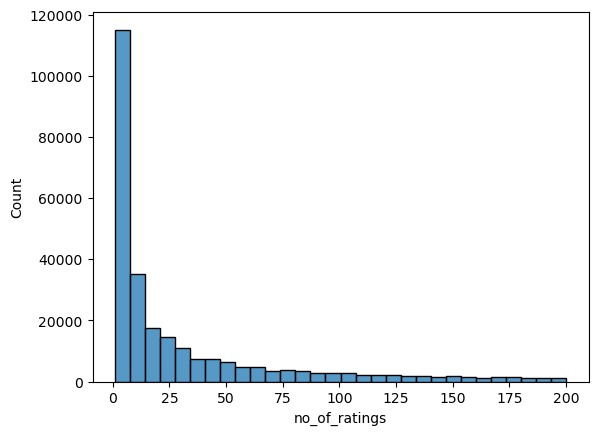

In [97]:
# almost 160k of products have number of ratings less than 25
threshold1 = 200
sns.histplot(df[df['no_of_ratings'] <= threshold1]['no_of_ratings'],kde=False,bins=30)

### Most of products have number of ratings less than 25
#### 大多数产品的评论数不超过25

In [98]:
df.sort_values(by='discount_rate', ascending=False).head(10)
# this give us top 10 product with the craziest discount
# It may due to some shopping spree or some sort of activities to sell as a extremely lowest price for markting and promotion
# 观察折扣率最高的前十个产品，基本上接近100折扣，这可以是因为产品做活动（秒杀价），或者商品本身的定价上的选择（Amazon Pay eGift Card）

name  manufacturer  \
178017  Marutivilla Insect Killer, Mosquito Killer Lig...   Marutivilla   
363501  Clovia Women's Activewear Ankle Length Printed...        Clovia   
450589                              Amazon Pay eGift Card        Amazon   
51541                               Amazon Pay eGift Card        Amazon   
5403    IONIX ro pipe 10 Meters length, Ro tubing 1/4 ...         IONIX   
310891  IONIX ro pipe 10 Meters length, Ro tubing 1/4 ...         IONIX   
5404    IONIX ro pipe 10 Meters length, Ro tubing 1/4 ...         IONIX   
115862            AmazonBasics ABS Horn Bell for Bicycles  AmazonBasics   
63825   Yauhody 8K HDMI 2.1 Cable 3m, 48Gbps Ultra Hig...       Yauhody   
64642   8K HDMI Fiber Optic Cable 33ft/10m, Ultra High...            8K   

              main_category               sub_category  \
178017       home & kitchen          Garden & Outdoors   
363501     sports & fitness                    Running   
450589       bags & luggage                    Wallets   
51541           accessories             Bags & Luggage   
5403             appliances             All Appliances   
310891           appliances  Kitchen & Home Appliances   
5404             appliances             All Appliances   
115862     sports & fitness                    Cycling   
63825   tv, audio & cameras         Camera Accessories   
64642   tv, audio & cameras         Camera Accessories   

                                                    image  \
178017  https://m.media-amazon.com/images/W/IMAGERENDE...   
363501  https://m.media-amazon.com/images/I/61ssMT12tF...   
450589  https://m.media-amazon.com/images/I/41HjQhYFkj...   
51541   https://m.media-amazon.com/images/I/41HjQhYFkj...   
5403    https://m.media-amazon.com/images/I/314zSspo+G...   
310891  https://m.media-amazon.com/images/I/314zSspo+G...   
5404    https://m.media-amazon.com/images/W/IMAGERENDE...   
115862  https://m.media-amazon.com/images/W/IMAGERENDE...   
63825   https://m.media-amazon.com/images/I/61jS5EOc5D...   
64642   https://m.media-amazon.com/images/I/61uBfLW0v0...   

                                                     link  ratings  \
178017  https://www.amazon.in/Marutivilla-Mosquito-Suc...      2.0   
363501  https://www.amazon.in/Clovia-Womens-Activewear...      3.2   
450589  https://www.amazon.in/Amazon-Pay-eGift-Card-Cr...      4.6   
51541   https://www.amazon.in/Amazon-Pay-eGift-Card-Cr...      4.6   
5403    https://www.amazon.in/Ionix-Meters-length-tubi...      3.8   
310891  https://www.amazon.in/Ionix-Meters-length-tubi...      3.8   
5404    https://www.amazon.in/Ionix-Meters-length-tubi...      3.8   
115862  https://www.amazon.in/AmazonBasics-abcancytoac...      4.0   
63825   https://www.amazon.in/8K-HDMI-2-1-Cable-10ft/d...      4.7   
64642   https://www.amazon.in/48Gbps-Supports-Resoluti...      4.7   

        no_of_ratings  discount_price  actual_price  discount_value  \
178017            1.0           589.0  9.900000e+09    9.899999e+09   
363501            4.0           688.0  6.108299e+07    6.108230e+07   
450589       182473.0            10.0  1.000000e+04    9.990000e+03   
51541        182448.0            10.0  1.000000e+04    9.990000e+03   
5403            270.0           110.0  3.150000e+04    3.139000e+04   
310891          270.0           110.0  3.150000e+04    3.139000e+04   
5404            270.0           110.0  3.150000e+04    3.139000e+04   
115862           46.0            75.0  9.999000e+03    9.924000e+03   
63825           388.0           799.0  9.465500e+04    9.385600e+04   
64642           388.0           799.0  9.465500e+04    9.385600e+04   

        discount_rate  
178017       1.000000  
363501       0.999989  
450589       0.999000  
51541        0.999000  
5403         0.996508  
310891       0.996508  
5404         0.996508  
115862       0.992499  
63825        0.991559  
64642        0.991559

<Axes: xlabel='discount_rate', ylabel='Count'>

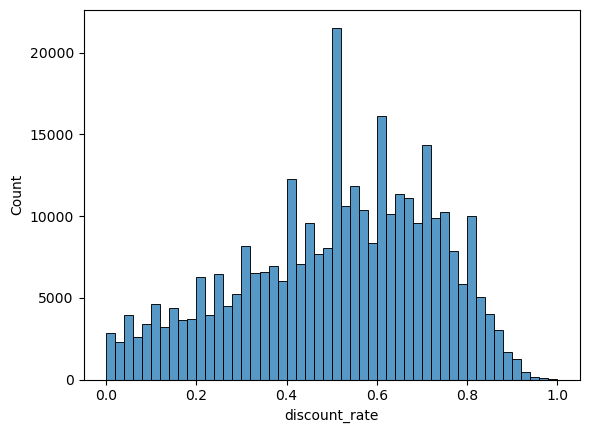

In [99]:
sns.histplot(df['discount_rate'],kde=False,bins=50)

### majority of the products have roughly 50% of discount
#### 大多数产品的折扣率在大概50%左右

In [ ]:
# 还有很多数据值得探索，